In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

RAND = 10

Это набор данных из одного банка в Соединенных Штатах. Помимо обычных услуг, этот банк также предоставляет услуги по страхованию автомобилей. Банк регулярно организует кампании по привлечению новых клиентов. У банка есть данные потенциальных клиентов, и сотрудники банка звонят им для рекламы доступных вариантов страхования автомобилей. Нам предоставляется общая информация о клиентах (возраст, работа и т.д.). 

А также более конкретная информация о текущей кампании по продаже страховых услуг (общение, последний день контакта) и предыдущих кампаниях (такие атрибуты, как предыдущие попытки, результат).
У вас есть данные о 4000 клиентах, с которыми связывались во время последней кампании и для которых известны результаты кампании (купил клиент страховку или нет).

Задача состоит в том, чтобы написать модель, которая будет предсказать для клиентов, с которыми связались во время текущей кампании, будут ли они покупать страховку автомобиля или нет.


**Атрибуты**:

- Id - уникальный идентификатор клиента
- Age - Возраст
- Job - Работа
- Marital - Семейное положение
- Education - Образование
- Default - Имеет ли кредит по умолчанию?
- Balance - Среднегодовой баланс, в долларах США
- HHInsurance - Застраховано ли домашнее хозяйство
- CarLoan - Имеет ли клиент автокредит
- Communication - Тип контактной связи
- LastContactDay - День последнего контакта
- LastContactMonth - Месяц последнего контакта
- NoOfContacts - Количество контактов, выполненных в ходе этой кампании для данного клиента
- DaysPassed - Количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (числовое значение; -1 означает, что с клиентом ранее не связывались)
- PrevAttempts - Количество контактов, выполненных до этой кампании и для данного клиента
- Outcome - Результаты предыдущей маркетинговой кампании
- CallStart - Время начала последнего звонка
- CallEnd - Время конца последнего звонка
- CarInsurance - Оформил ли клиент страховку автомобиля?

**Установите с самом начале (в качестве random_state) RAND=10**

# Import data

1) Прочитать файл carInsurance_train.csv и записать в переменную df

In [2]:
df = pd.read_csv('carInsurance_train.csv')

In [3]:
df[:5]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


2) Вывести общую информацию о датасете при помощи метода info(), а также основные описательные статистики для числовых и категориальных признаков

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [5]:
df.shape

(4000, 19)

In [6]:
df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [7]:
df.describe(include=object)

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


In [8]:
df.isna().sum()/df.shape[0] * 100

Id                   0.000
Age                  0.000
Job                  0.475
Marital              0.000
Education            4.225
Default              0.000
Balance              0.000
HHInsurance          0.000
CarLoan              0.000
Communication       22.550
LastContactDay       0.000
LastContactMonth     0.000
NoOfContacts         0.000
DaysPassed           0.000
PrevAttempts         0.000
Outcome             76.050
CallStart            0.000
CallEnd              0.000
CarInsurance         0.000
dtype: float64

# EDA

3) Посмотрите на целевую переменную CarInsurance, есть ли дисбаланс классов? Отобразите на графике процентное содержание объектов в каждом классе (пример в лекции по EDA)

Text(0, 0.5, 'Проценты')

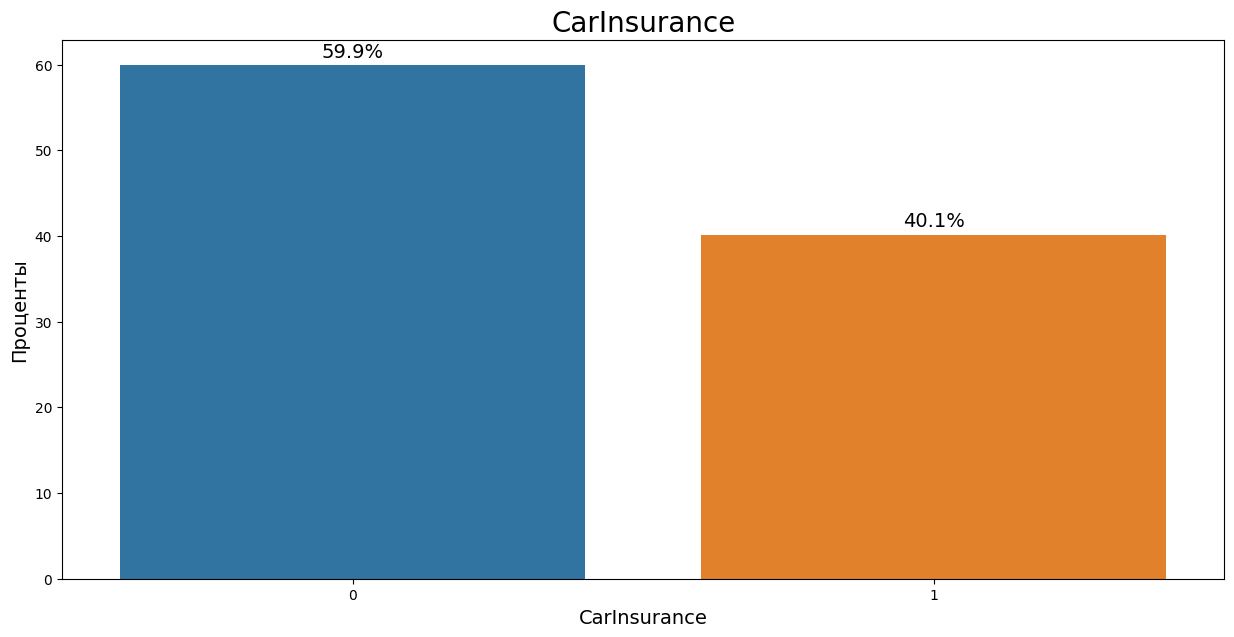

In [9]:
norm_target = (df
               .CarInsurance
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(data=norm_target, x='index', y='percent')

for p in ax.patches:
    perc = '{:.1f}%'.format(p.get_height())
    ax.annotate(perc,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=14)
    
plt.title('CarInsurance', fontsize=20)
plt.xlabel('CarInsurance', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

4) При помощи признака **CallEnd** создать новый признак **time_of_day** - сутки, где:
- Если значение в CallEnd больше или равно 12 часам, то значение в признаке time_of_day='Afternoon'
- Иначе 'Morning'

Подсказка: можно преобразовать признак CallEnd при помощи pd.to_datetime (используйте часы из даты!), далее использовать transform и lambda, сделать это можно в одной строке.

In [10]:
df['time_of_day'] = df.CallEnd.transform(
    lambda x: 'Afternoon' if int(x[:2]) >= 12 else 'Morning')

df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,time_of_day
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0,Afternoon
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0,Afternoon
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1,Afternoon
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1,Afternoon
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1,Afternoon
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0,Afternoon
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0,Afternoon
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0,Morning


5) Создайте новый признак **call_duration** - длительность последнего звонка **в секундах** тип int, должно быть положительное значение!

- использовать CallEnd и CallStart (подсказка pd.to_datetime и далее для вычисления секунд transform lambda)
- после чего **удалите признаки CallEnd и CallStart**

In [11]:
df['call_duration'] = ((pd.to_datetime(df.CallEnd) -
                       pd.to_datetime(df.CallStart))
                       .transform(lambda x: x.total_seconds()))

df.drop(['CallEnd', 'CallStart'], axis=1, inplace=True)

6) Создайте признаки:

- **Age_bins** - на основе признака Age при помощи функции get_bins_age() ниже
- **Balance_bins** - на основе признака Balance при помощи функции get_bins_balance() ниже

In [12]:
def get_bins_age(data: int) -> str:
    """
    Генерация бинов для признака "возраст"
    """
    if isinstance(data, (int, float)):
        if data <= 35:
            return 'young'
        elif 35 < data <= 55:
            return 'middle-aged'
        elif data > 55:
            return 'older'

In [13]:
def get_bins_balance(data: int) -> str:
    """
    Генерация бинов для признака "доход/зарплата"
    """
    if isinstance(data, (int, float)):
        if data <= 1000:
            return 'low'
        elif 1000 < data <= 5000:
            return 'middle'
        elif data > 5000:
            return 'high'

In [14]:
df['Age_bins'] = df['Age'].transform(get_bins_age)
df['Balance_bins'] = df['Balance'].transform(get_bins_balance)

df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,...,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,time_of_day,call_duration,Age_bins,Balance_bins
0,1,32,management,single,tertiary,0,1218,1,0,telephone,...,jan,2,-1,0,NaN,0,Afternoon,70.0,young,middle
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,...,may,5,-1,0,NaN,0,Afternoon,185.0,young,middle
2,3,29,management,single,tertiary,0,637,1,0,cellular,...,jun,1,119,1,failure,1,Afternoon,340.0,young,low
3,4,25,student,single,primary,0,373,1,0,cellular,...,may,2,-1,0,NaN,1,Afternoon,819.0,young,low
4,5,30,management,married,tertiary,0,2694,0,0,cellular,...,jun,1,-1,0,NaN,0,Afternoon,192.0,young,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,...,may,1,40,2,failure,1,Afternoon,269.0,young,low
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,...,jul,19,-1,0,NaN,0,Afternoon,125.0,middle-aged,low
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,...,jul,1,-1,0,NaN,0,Afternoon,290.0,young,low
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,...,jan,1,227,3,failure,0,Morning,99.0,middle-aged,low


7) Проверьте, есть ли пропуски? Если есть заполните 'None' - для object и медианой для числовых данных

In [15]:
df.fillna('None', inplace=True)
df.isna().sum()

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CarInsurance        0
time_of_day         0
call_duration       0
Age_bins            0
Balance_bins        0
dtype: int64

8) Преобразуйте категориальные данные в бинарные при помощи pd.get_dummies(), а также удалите колонку 'Id'. Числовые должны быть в том же виде. Запишите результат в новую переменную **df_label**. 

In [16]:
df_label = pd.get_dummies(df.drop('Id', axis=1), drop_first=True)
df_label

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,...,LastContactMonth_oct,LastContactMonth_sep,Outcome_failure,Outcome_other,Outcome_success,time_of_day_Morning,Age_bins_older,Age_bins_young,Balance_bins_low,Balance_bins_middle
0,32,0,1218,1,0,28,2,-1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,32,0,1156,1,0,26,5,-1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,29,0,637,1,0,3,1,119,1,1,...,0,0,1,0,0,0,0,1,1,0
3,25,0,373,1,0,11,2,-1,0,1,...,0,0,0,0,0,0,0,1,1,0
4,30,0,2694,0,0,3,1,-1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,0,0,1,0,25,1,40,2,1,...,0,0,1,0,0,0,0,1,1,0
3996,49,0,124,1,1,29,19,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
3997,27,0,-400,0,1,8,1,-1,0,0,...,0,0,0,0,0,0,0,1,1,0
3998,36,0,658,1,0,29,1,227,3,0,...,0,0,1,0,0,1,0,0,1,0


# Modeling

9) Разделите выборку на train и test данные. Используйте стратификацию stratify, test_size=0.2, а также фиксацию random_state. Целевая переменная CarInsurance

In [17]:
from sklearn.metrics import f1_score, mean_absolute_error, roc_auc_score, \
    roc_curve, auc, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from get_metrics import get_metrics_classification

x = df_label.drop('CarInsurance', axis=1)
y = df_label.CarInsurance

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=RAND)

## Baseline

10) Обучение бейзлайнов:

- Обучите бейзлайны **BaggingClassifier** и **RandomForestlassifier**, не забудьте везде зафиксировать random_state
- Добавьте для каждого алгоритма результаты в датасет с метриками **metrics**
- Сравните результаты по метрикам
- Проверьте, не переобучились ли модели

In [18]:
model_bag = BaggingClassifier(random_state=RAND)
model_for = RandomForestClassifier(random_state=RAND)

model_bag.fit(x_train, y_train)
model_for.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [19]:
y_pred = model_bag.predict(x_train)
y_score = model_bag.predict_proba(x_train)

metrics = get_metrics_classification(y_train, y_pred, y_score, 'Bagging_base_train')

y_pred = model_bag.predict(x_test)
y_score = model_bag.predict_proba(x_test)

metrics = metrics.append(get_metrics_classification(y_test, y_pred, y_score, 'Bagging_base_test'))

metrics

/tmp/ipykernel_3884/946832398.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(get_metrics_classification(y_test, y_pred, y_score, 'Bagging_base_test'))


,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Bagging_base_train,0.99125,0.999644,0.994484,0.983632,0.989028,0.100894
0,Bagging_base_test,0.81000,0.885877,0.775244,0.741433,0.757962,0.750899


In [20]:
y_pred = model_for.predict(x_train)
y_score = model_for.predict_proba(x_train)

metrics = metrics.append(get_metrics_classification(y_train, y_pred, y_score, 'RandForest_base_train'))

y_pred = model_for.predict(x_test)
y_score = model_for.predict_proba(x_test)

metrics = metrics.append(get_metrics_classification(y_test, y_pred, y_score, 'RandForest_base_test'))

metrics

/tmp/ipykernel_3884/1879360202.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(get_metrics_classification(y_train, y_pred, y_score, 'RandForest_base_train'))
/tmp/ipykernel_3884/1879360202.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(get_metrics_classification(y_test, y_pred, y_score, 'RandForest_base_test'))


,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Bagging_base_train,0.99125,0.999644,0.994484,0.983632,0.989028,0.100894
0,Bagging_base_test,0.81000,0.885877,0.775244,0.741433,0.757962,0.750899
0,RandForest_base_train,1.00000,1.000000,1.000000,1.000000,1.000000,0.107582
0,RandForest_base_test,0.84500,0.922118,0.820847,0.785047,0.802548,0.370178


RandomForest показал лучшие результаты на трейне и на тесте. Обе модели переобучены.

## GridSearchCV

11) Выберите лучший бейзлайн (алгоритм) и найдите лучшие параметры помощи Gridsearch, также используйте кросс-валидацию со стратификацией внутри GridSearchCV на 3 фолдах

Находить параметры вы можете долго ~ 10-30 минут, поставьте n_jobs=-1, чтобы быстрее обучался алгоритм

In [21]:
params = {
    'n_estimators': [400, 600, 800, 1000],
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.linspace(4, 16, 4, dtype=int),
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [2,4,6],
    'class_weight': ['balanced'],
    'n_jobs': [-1],
}

model = RandomForestClassifier(random_state=RAND)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RAND)

grid_cv = GridSearchCV(model,
                       params,
                       cv=cv,
                       scoring='roc_auc',
                       n_jobs=-1)

In [22]:
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': array([ 4,  8, 12, 16]),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [400, 600, 800, 1000],
                         'n_jobs': [-1]},
             scoring='roc_auc')

In [23]:
grid_cv.best_score_

0.9179743841619646

In [24]:
grid_cv.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 1000,
 'n_jobs': -1}

In [25]:
import optuna

In [26]:
def objective(trial: optuna.Trial, x, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'criterion': trial.suggest_categorical('criterion', ['entropy', 'gini', 'log_loss']),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'max_depth': trial.suggest_int('max_depth', 1, 200),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
    }

    cv_pred = np.empty(3)
    cv = StratifiedKFold(n_splits=3, random_state=RAND, shuffle=True)

    for fold, (train_idx, test_idx) in enumerate(cv.split(x, y)):
        x_train_, x_val_ = x.values[train_idx], x.values[test_idx]
        y_train_, y_val_ = y.values[train_idx], y.values[test_idx]

        model = RandomForestClassifier(
            class_weight = 'balanced',
            n_jobs = -1,
            random_state=RAND,
            **params
        )
        model.fit(x_train_, y_train_)

        y_pred = model.predict(x_val_)
        y_proba = model.predict_proba(x_val_)[:, 1]

        cv_pred[fold] = roc_auc_score(y_val_, y_proba)
    return (np.mean(cv_pred))

In [27]:
func = lambda trial: objective(trial, x_train, y_train)

study = optuna.create_study(direction="maximize")
study.optimize(func, n_trials=10)

[I 2023-02-10 13:22:09,749] A new study created in memory with name: no-name-05a75810-f669-4ad1-8410-6367de363e87
[I 2023-02-10 13:22:29,402] Trial 0 finished with value: 0.909455458842404 and parameters: {'n_estimators': 1355, 'criterion': 'entropy', 'max_features': 'sqrt', 'max_depth': 102, 'min_samples_leaf': 10, 'min_samples_split': 7}. Best is trial 0 with value: 0.909455458842404.
[I 2023-02-10 13:22:56,194] Trial 1 finished with value: 0.9173448615473833 and parameters: {'n_estimators': 1757, 'criterion': 'entropy', 'max_features': 'sqrt', 'max_depth': 42, 'min_samples_leaf': 2, 'min_samples_split': 5}. Best is trial 1 with value: 0.9173448615473833.
[I 2023-02-10 13:23:05,198] Trial 2 finished with value: 0.9121521056155522 and parameters: {'n_estimators': 610, 'criterion': 'log_loss', 'max_features': 'sqrt', 'max_depth': 122, 'min_samples_leaf': 7, 'min_samples_split': 15}. Best is trial 1 with value: 0.9173448615473833.
[I 2023-02-10 13:23:27,666] Trial 3 finished with value:

In [28]:
study.optimize(func, n_trials=50)

[I 2023-02-10 13:25:37,618] Trial 10 finished with value: 0.9092925842910198 and parameters: {'n_estimators': 1809, 'criterion': 'gini', 'max_features': 'log2', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}. Best is trial 1 with value: 0.9173448615473833.
[I 2023-02-10 13:26:07,941] Trial 11 finished with value: 0.9185908709895746 and parameters: {'n_estimators': 1960, 'criterion': 'log_loss', 'max_features': 'sqrt', 'max_depth': 136, 'min_samples_leaf': 1, 'min_samples_split': 5}. Best is trial 11 with value: 0.9185908709895746.
[I 2023-02-10 13:26:38,341] Trial 12 finished with value: 0.9176952179458561 and parameters: {'n_estimators': 1990, 'criterion': 'log_loss', 'max_features': 'log2', 'max_depth': 130, 'min_samples_leaf': 1, 'min_samples_split': 5}. Best is trial 11 with value: 0.9185908709895746.
[I 2023-02-10 13:27:08,628] Trial 13 finished with value: 0.9170962682049888 and parameters: {'n_estimators': 1980, 'criterion': 'log_loss', 'max_features': 'log2', 'm

[I 2023-02-10 13:32:06,807] Trial 39 finished with value: 0.9162640700726269 and parameters: {'n_estimators': 993, 'criterion': 'entropy', 'max_features': 'sqrt', 'max_depth': 182, 'min_samples_leaf': 3, 'min_samples_split': 6}. Best is trial 32 with value: 0.9186628318446961.
[I 2023-02-10 13:32:17,957] Trial 40 finished with value: 0.9111512414687525 and parameters: {'n_estimators': 1615, 'criterion': 'log_loss', 'max_features': 'sqrt', 'max_depth': 121, 'min_samples_leaf': 8, 'min_samples_split': 14}. Best is trial 32 with value: 0.9186628318446961.
[I 2023-02-10 13:32:31,651] Trial 41 finished with value: 0.9183692511936835 and parameters: {'n_estimators': 1893, 'criterion': 'log_loss', 'max_features': 'sqrt', 'max_depth': 36, 'min_samples_leaf': 1, 'min_samples_split': 4}. Best is trial 32 with value: 0.9186628318446961.
[I 2023-02-10 13:32:45,276] Trial 42 finished with value: 0.9186676927917539 and parameters: {'n_estimators': 1896, 'criterion': 'log_loss', 'max_features': 'sqrt

In [29]:
study.best_params

{'n_estimators': 1896,
 'criterion': 'log_loss',
 'max_features': 'sqrt',
 'max_depth': 91,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [30]:
study.best_value

0.9186676927917539

## Learn model with best params (holdout)

12) Обучение модель выбранную ранее модель на лучших параметрах

- Далее используйте кросс-валидацию со стратификацией **StratifiedKFold с 3мя фолдами**
- Не забудьте для StratifiedKFold зафиксировать **random_state**
- Подайте на вход выбранной ранее модели **лучшие параметры**, полученные путем поиска по сетке
- В качестве метрики возьмите **ROC_AUC**
- На каждом фолде подсчитать значение **ROC-AUC на validation** данных и **вывести**
- Выведите по итогу **среднее значение ROC-AUC** полученное на всех фолдах

In [31]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RAND)
roc_aucs = []
y_pred_hold = []
y_score_hold = []

for fold, (train_idx, test_idx) in enumerate(cv.split(x_train.values, y_train.values)):
    x_train_, x_val_ = x_train.values[train_idx], x_train.values[test_idx]
    y_train_, y_val_ = y_train.values[train_idx], y_train.values[test_idx]

    model = RandomForestClassifier(**study.best_params, random_state=RAND)
    model.fit(x_train_, y_train_)

    y_score = model.predict_proba(x_val_)

    roc_aucs.append(roc_auc_score(y_val_, y_score[:, 1]))

    y_pred_hold.append(model.predict(x_test))
    y_score_hold.append(model.predict_proba(x_test))

y_pred = stats.mode(np.column_stack(y_pred_hold), axis=1)[0]
y_score = np.column_stack([np.mean(np.column_stack(y_score_hold)[:, ::2], axis=1),
                           np.mean(np.column_stack(y_score_hold)[:, 1::2], axis=1)])

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: 

13) Получите **предсказанные значения на Holdout** данных при помощи усреднения значений (для вероятностй) и моды (для меток классов), полученных при обучении на фолдах

**Сравните** результат ROC-AUC на validation (OOF) и на test данных (Holdout)

In [32]:
print(np.mean(roc_aucs))
print(roc_auc_score(y_test, y_score[:, 1]))

0.9190239319922737
0.9207200879298123


14) Добавьте в датасет с метриками **metrics** результаты обучения модели с **StratifiedKFold на Holdout данных**.

Где вы получили самые наилучшие результаты?

In [33]:
metrics = metrics.append(get_metrics_classification(y_test, y_pred, y_score, 'RandForest_best_test'))

/tmp/ipykernel_3884/131048836.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(get_metrics_classification(y_test, y_pred, y_score, 'RandForest_best_test'))


In [34]:
metrics

,model,Accuracy,ROC_AUC,Precision,Recall,f1,Logloss
0,Bagging_base_train,0.99125,0.999644,0.994484,0.983632,0.989028,0.100894
0,Bagging_base_test,0.81000,0.885877,0.775244,0.741433,0.757962,0.750899
0,RandForest_base_train,1.00000,1.000000,1.000000,1.000000,1.000000,0.107582
0,RandForest_base_test,0.84500,0.922118,0.820847,0.785047,0.802548,0.370178
0,RandForest_best_test,0.85250,0.920720,0.826367,0.800623,0.813291,0.383332


**Если вы получили ROC-AUC на Holdout меньше 0.92, то нужно тщательнее подобрать параметры в GridSearchCV, иначе работа не будет засчитана**

# Feature importance

15) Важные признаки

- Чтобы нам было чуть проще, обучите выбранную модель из **12 задания** на наилучших подобранных для нее параметрах, **кросс-валидация не нужна**
- Выведите feature importance для лучшего алгоритма с подобранными параметрами 2-мя способами:
    - **Permutation Importance**
    - Библиотеку **SHAP** (подсказка, можно рассмотреть только для одного класса shap_values[:, :, 1] - 1ый класс) 
- Какие первые три признака оказывают наибольшее влияние на то, что клиент оформит/не оформит страховку?

In [35]:
from sklearn.inspection import permutation_importance

model = RandomForestClassifier(**study.best_params, random_state=RAND)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=91, min_samples_split=5,
                       n_estimators=1896, random_state=10)

In [36]:
perm = permutation_importance(model,
                              x_test.values,
                              y_test.values,
                              random_state=RAND,
                              n_repeats=2)

perm_df = pd.DataFrame({
    'feature': list(x_test.columns),
    'value': perm['importances_mean']
}).sort_values(by='value', ascending=False)

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_e

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_e

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/user/jupyter_e

In [37]:
perm_df

,feature,value
9,call_duration,0.206875
26,Communication_cellular,0.020625
3,HHInsurance,0.016875
41,Outcome_success,0.013125
0,Age,0.010625
34,LastContactMonth_mar,0.009375
5,LastContactDay,0.005625
27,Communication_telephone,0.005625
28,LastContactMonth_aug,0.003750
35,LastContactMonth_may,0.003750


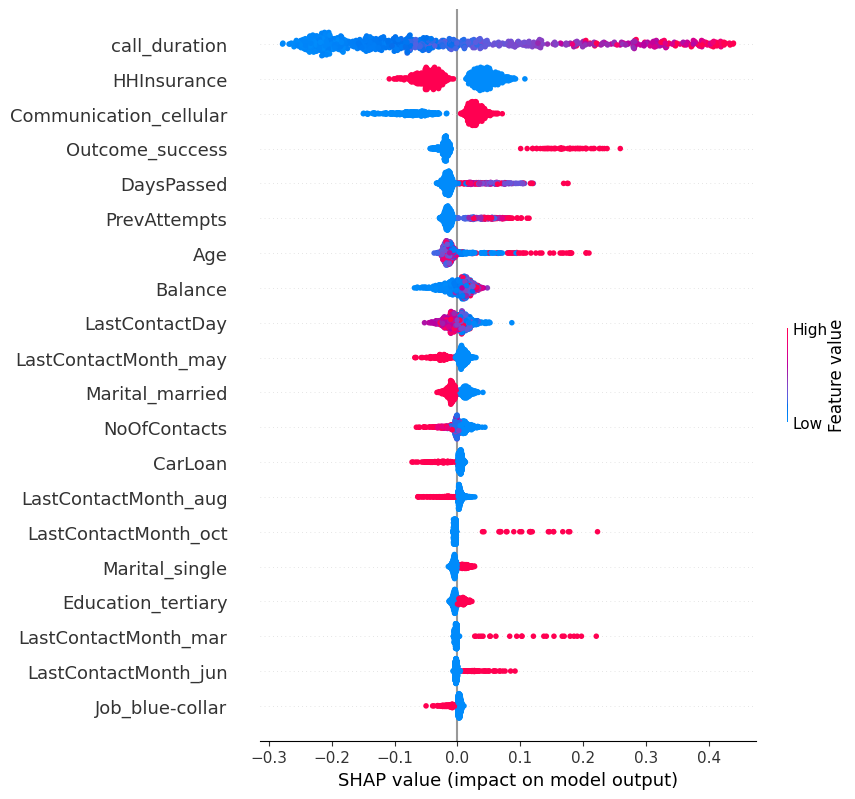

In [38]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer(x_test)

shap.summary_plot(shap_values[:,:,1], x_test)

In [39]:
shap_values

.values =
array([[[ 1.63614464e-02, -1.63614464e-02],
        [-1.36315735e-04,  1.36315735e-04],
        [-9.15681316e-03,  9.15681316e-03],
        ...,
        [-1.96376530e-04,  1.96376530e-04],
        [ 2.95002228e-03, -2.95002228e-03],
        [ 2.53303215e-03, -2.53303215e-03]],

       [[ 1.37224414e-02, -1.37224414e-02],
        [-2.97617090e-04,  2.97617090e-04],
        [ 9.36205856e-03, -9.36205856e-03],
        ...,
        [ 1.78238991e-03, -1.78238991e-03],
        [-1.18140977e-03,  1.18140977e-03],
        [ 9.14164967e-04, -9.14164967e-04]],

       [[ 9.26584071e-03, -9.26584071e-03],
        [-2.58217566e-04,  2.58217566e-04],
        [ 2.45422041e-04, -2.45422041e-04],
        ...,
        [-6.29825924e-03,  6.29825924e-03],
        [ 4.61890438e-03, -4.61890438e-03],
        [ 1.44974408e-03, -1.44974408e-03]],

       ...,

       [[ 5.49846145e-03, -5.49846145e-03],
        [-3.86683616e-04,  3.86683616e-04],
        [ 7.80875853e-03, -7.80875853e-03],
        

# Задание со звездочкой

16) Попробуйте изучить первые ТОП-5 признаков (можно permutation использовать, либо shap) из задания 15 при помощи различных графиков. Лучше использовать не бинаризованный датасет для анализа различных значений в признаке.

Сделайте **выводы** на основании графиков и дайте **рекомендации бизнесу** (написать в 3-4 предложениях) по тому, на каких клиентов стоит обратить внимание, либо на какие-то аспекты в работе (зависит от набора признаков)

Самыми важными признаками по shap являются call_duration, Communication_cellular, DaysPassed, HHInsurance, Outcome_success

In [86]:
def barplot_group(col_main: str, col_group: str, title: str = None) -> None:
    """
    Построение barplot с нормированными данными с выводом значений на графике
    """

    plt.figure(figsize=(15, 7))

    data = (df.groupby([col_group])[col_main]
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values(col_group))

    ax = sns.barplot(x=col_main, y="percentage",
                     hue=col_group, data=data, palette='rocket')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(percentage,  # текст
                    (p.get_x() + p.get_width() / 2.,
                     p.get_height()),  # координата xy
                    ha='center',  # центрирование
                    va='center',
                    xytext=(0, 7),
                    textcoords='offset points',  # точка смещения относительно координаты
                    fontsize=12)

    plt.title(title, fontsize=16)
    plt.ylabel('Percentage', fontsize=14)
    plt.xlabel(col_main, fontsize=14)
    plt.show()


def barplot_percent(col: str, df: pd.DataFrame):
    norm_target = (df[col]
                   .value_counts(normalize=True)
                   .mul(100)
                   .rename('percent')
                   .reset_index())

    plt.figure(figsize=(15, 7))
    ax = sns.barplot(x='index', y='percent', data=norm_target)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(percentage,  # текст
                    # координата xy
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    # центрирование
                    ha='center',
                    va='center',
                    xytext=(0, 10),
                    # точка смещения относительно координаты
                    textcoords='offset points',
                    fontsize=14)

    plt.title(col, fontsize=20)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Проценты', fontsize=14)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

<AxesSubplot:xlabel='CarInsurance', ylabel='call_duration'>

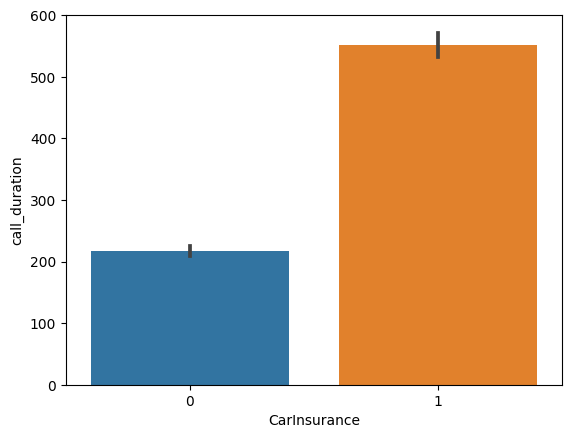

In [56]:
sns.barplot(data=df, x='CarInsurance', y='call_duration')

Как видно по графику, средняя длительность разговора с клиентом, оформившим страховку, значительно выше. Однако утверждать, что путем увеличения длительности диалога можно увеличить процент клиентов, оформивших страховку, нельзя, так как 2 возможных интерпретации данной взамосвязи. 1 - желание клиента оформить страховку действительно растет по мере разговора, 2 - клиент изначально был заинтересован в оформлении страховки, из-за чего дольше общался с сотрудником колл-центра, задавая ему дополнительные вопросы по условиям. Понять, какая из этих гипотез является верной, данные не позволяют 

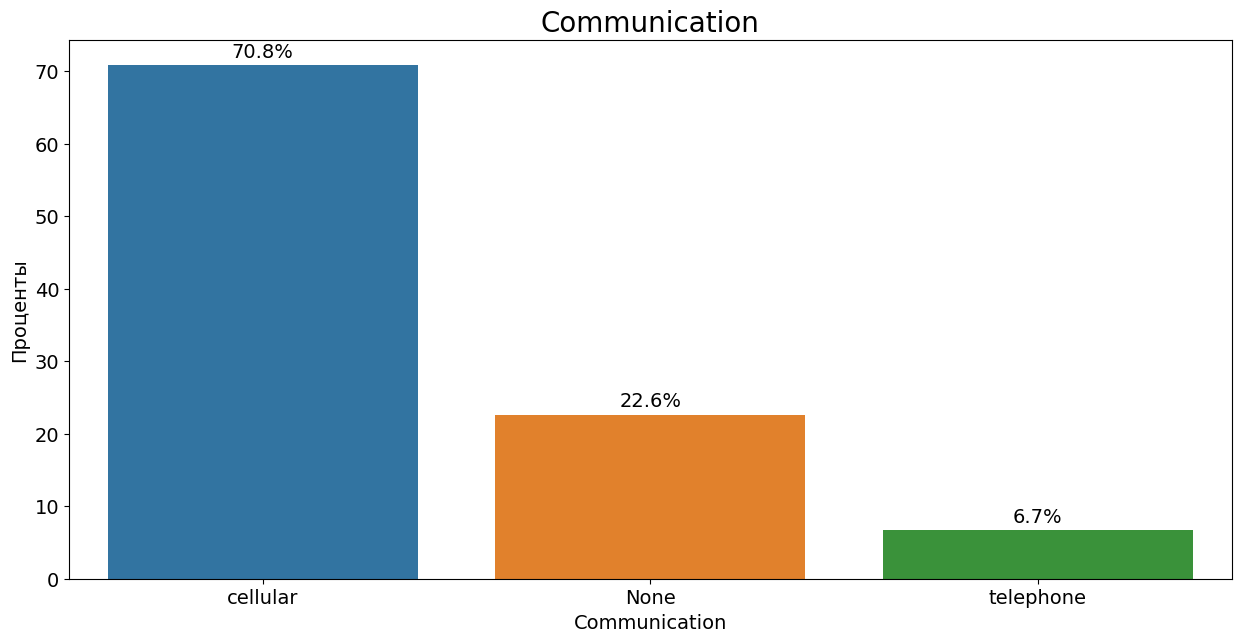

In [87]:
barplot_percent('Communication', df)

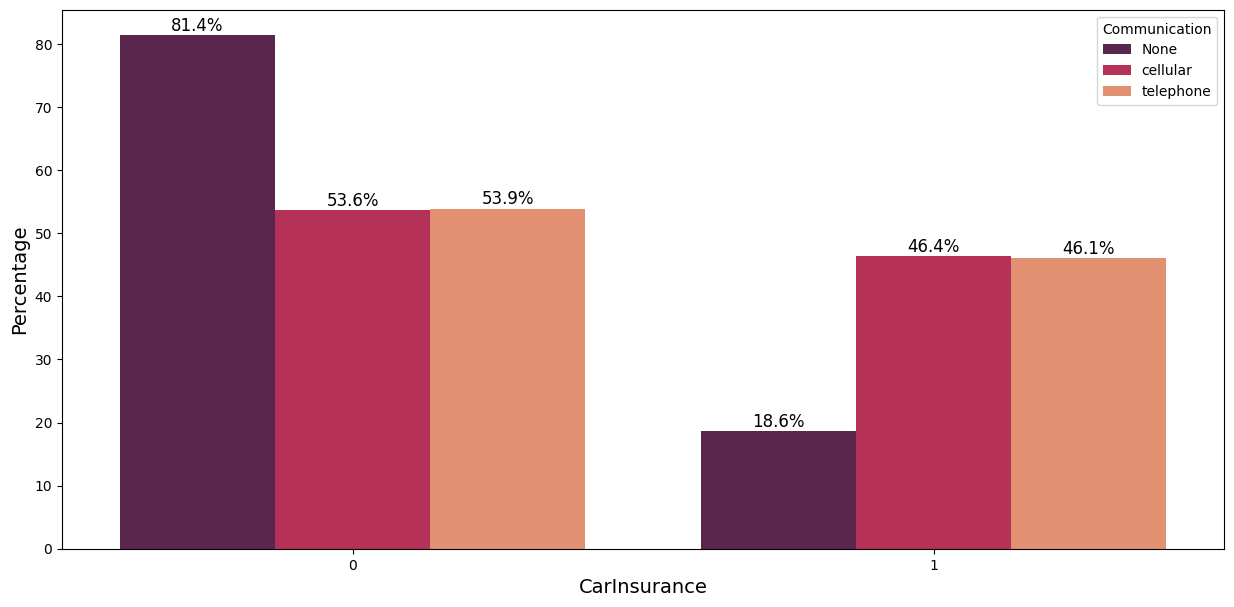

In [70]:
barplot_group('CarInsurance', 'Communication')

Процент клиентов, оформивших страховку, контакт с которыми осуществлялся через cellular и telelphone (PS не совсем понимаю, чем различаются эти типы связи). Для того чтобы полностью интерпретировать данные, необходимо узнать, какой тип связи подразумевает None. 

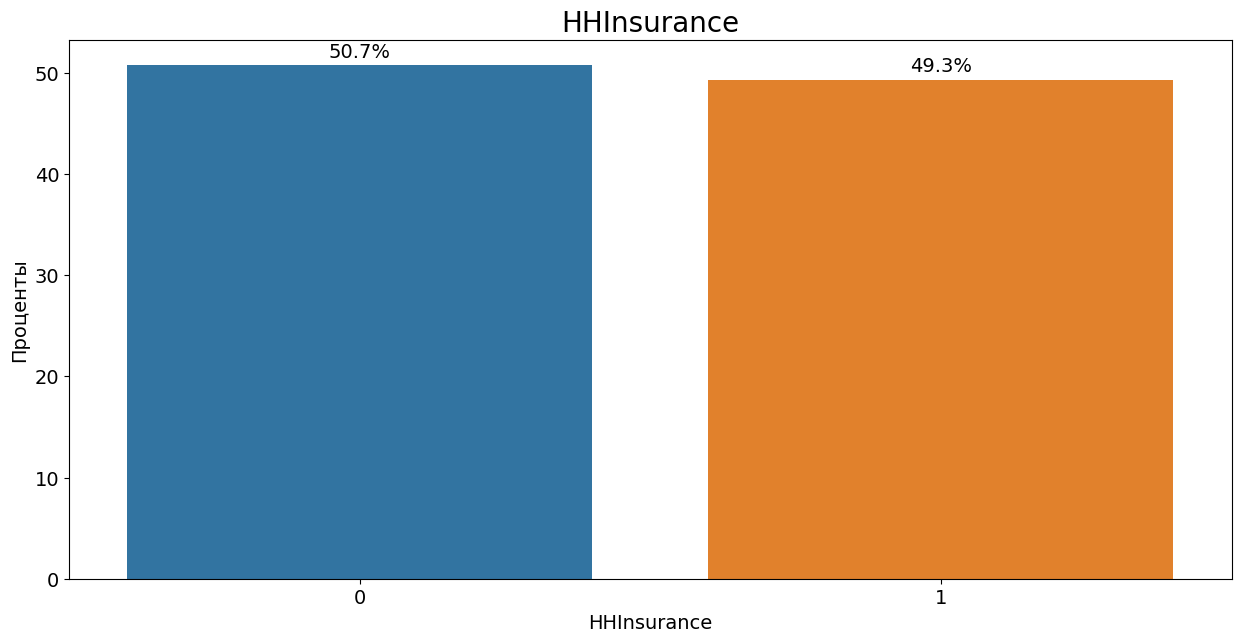

In [88]:
barplot_percent('HHInsurance', df)

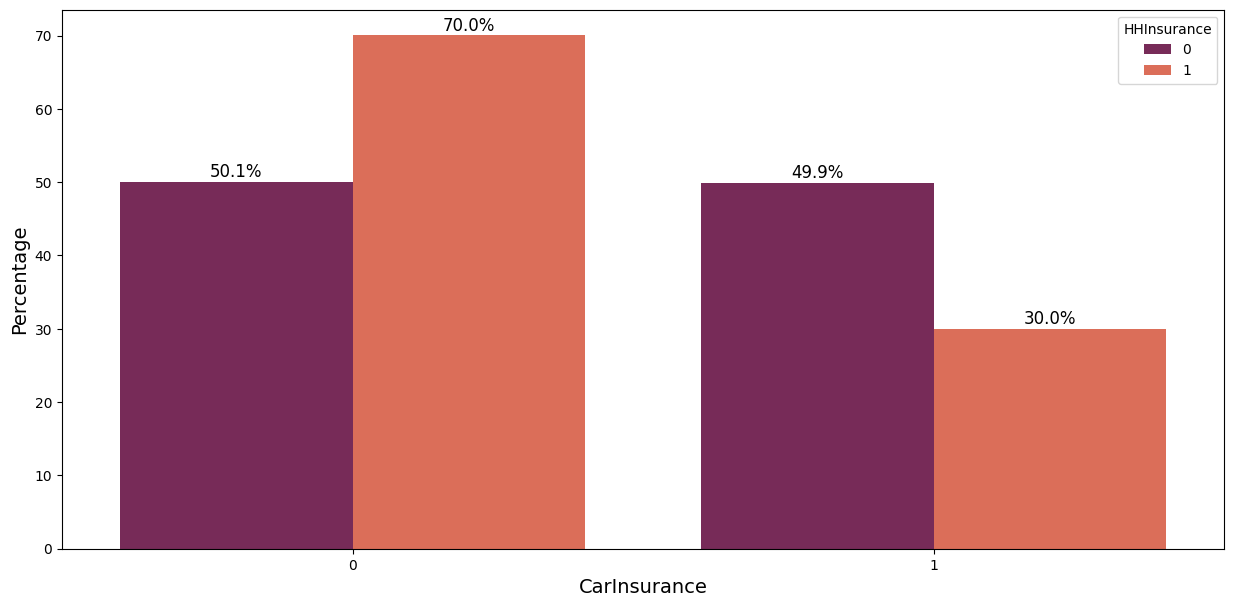

In [78]:
barplot_group('CarInsurance', 'HHInsurance')

Данные показывают, что клиент с незастрахованным домашним хозяйством с большим шансом оформит страховку на транспортное средство. Компании следует обратить внимание на соответствующих клиентов для увеличения количество контрактов

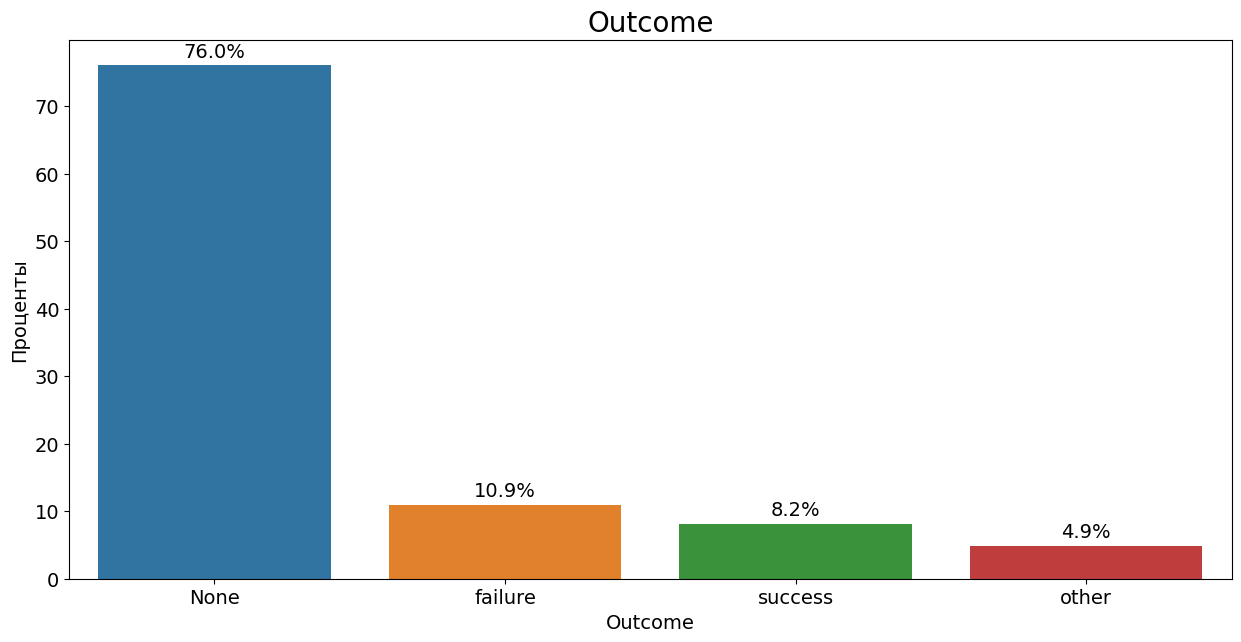

In [89]:
barplot_percent('Outcome', df)

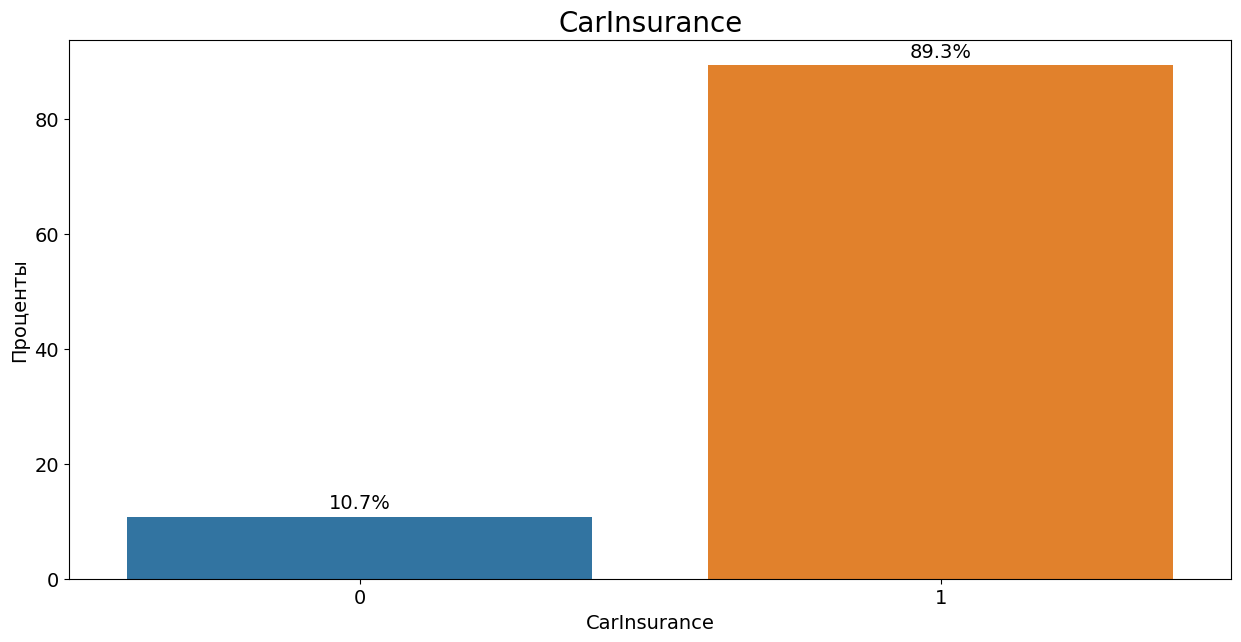

In [91]:
barplot_percent('CarInsurance', df[df.Outcome == 'success'])

Клиенты, оформившие страховку по результатам прошлой маркетинговой кампании, с большим шансом оформят ее снова, что логично. В этой маркетинговой кампании 90% подобных клиентов подписали страховой контракт. У компании есть вектор развития -> увеличение этого процента путем улучшения условий и качества услуг.

<AxesSubplot:xlabel='CarInsurance', ylabel='DaysPassed'>

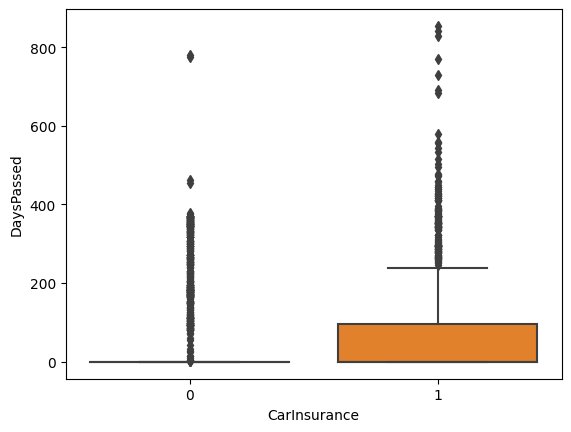

In [92]:
sns.boxplot(data=df, x='CarInsurance', y='DaysPassed')

<AxesSubplot:xlabel='CarInsurance', ylabel='DaysPassed'>

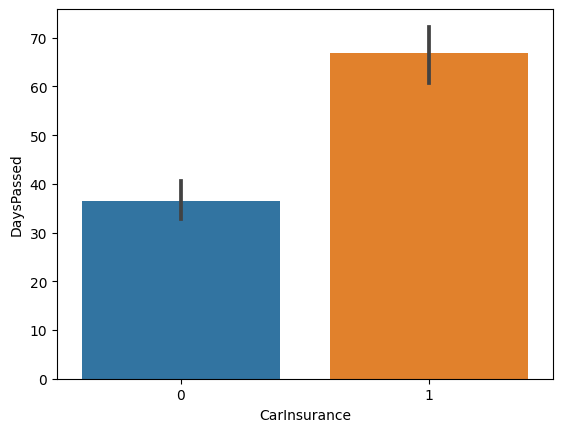

In [103]:
sns.barplot(data=df, x='CarInsurance', y='DaysPassed')

<AxesSubplot:xlabel='CarInsurance', ylabel='DaysPassed'>

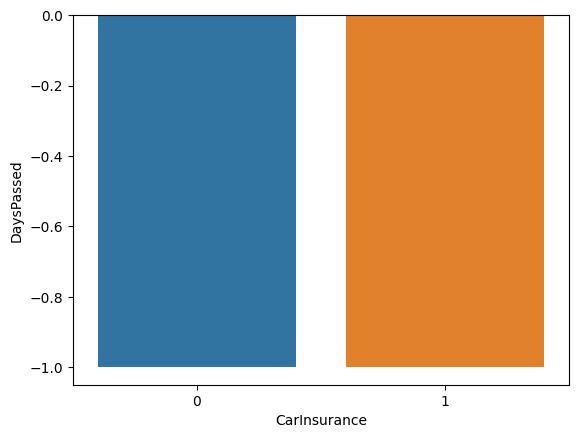

In [105]:
sns.barplot(data=df, x='CarInsurance', y='DaysPassed', estimator=np.median)

<AxesSubplot:xlabel='DaysPassed', ylabel='Count'>

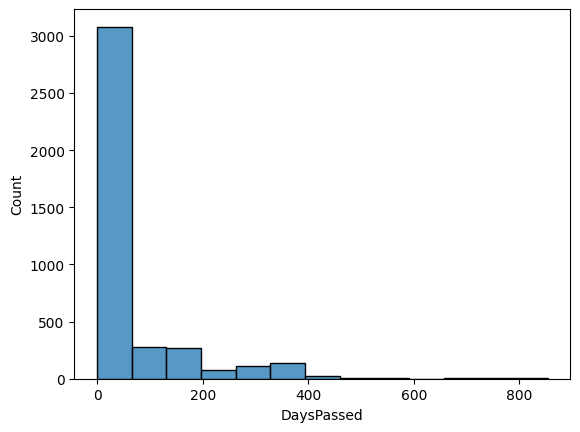

In [104]:
sns.histplot(x=df.DaysPassed)

В признаке DaysPassed много выбросов, поэтому график barplot c estimator = 'mean'(default) может давать нерелевантные результаты. Однако модель говорит, что клиенты, у которых между последним и предпоследним контактами больше дней, чаще оформляют страовку
P.S. Не понимаю, почему barplot с estimator=np.median рабоатает некорректно, и как иначе можно показать данные с этой функцией.